# LETR Basic Usage Demo

In [3]:
import numpy as np
import json
import torch
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
import torchvision.transforms.functional as functional
import torch.nn.functional as F
from models import build_model
from util.misc import nested_tensor_from_tensor_list

In [2]:
class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image):
        for t in self.transforms:
            image = t(image)
        return image

    def __repr__(self):
        format_string = self.__class__.__name__ + "("
        for t in self.transforms:
            format_string += "\n"
            format_string += "    {0}".format(t)
        format_string += "\n)"
        return format_string

class Normalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, image):
        image = functional.normalize(image, mean=self.mean, std=self.std)
        return image

class ToTensor(object):
    def __call__(self, img):
        return functional.to_tensor(img)

def resize(image, size, max_size=None):
    # size can be min_size (scalar) or (w, h) tuple
    def get_size_with_aspect_ratio(image_size, size, max_size=None):
        w, h = image_size
        if max_size is not None:
            min_original_size = float(min((w, h)))
            max_original_size = float(max((w, h)))
            if max_original_size / min_original_size * size > max_size:
                size = int(round(max_size * min_original_size / max_original_size))
        if (w <= h and w == size) or (h <= w and h == size):
            return (h, w)
        if w < h:
            ow = size
            oh = int(size * h / w)
        else:
            oh = size
            ow = int(size * w / h)
        return (oh, ow)

    def get_size(image_size, size, max_size=None):
        if isinstance(size, (list, tuple)):
            return size[::-1]
        else:
            return get_size_with_aspect_ratio(image_size, size, max_size)

    size = get_size(image.size, size, max_size)
    rescaled_image = functional.resize(image, size)

    return rescaled_image

class Resize(object):
    def __init__(self, sizes, max_size=None):
        assert isinstance(sizes, (list, tuple))
        self.sizes = sizes
        self.max_size = max_size

    def __call__(self, img):
        size = self.sizes
        return resize(img, size, self.max_size)



In [4]:
img_path = '../dataset_marco/train2017/frame.0000.jpg'
img = cv2.imread(img_path)
annotations_path = '../dataset_marco/annotations/lines_train2017.json'
anno = json.load(open(annotations_path, 'r'))

In [31]:
len(anno['annotations'])
lines = []
for i in range(len(anno['annotations'])):
    lines.append((anno['annotations'][i]['line'], anno['annotations'][i]['category_id']))
lines[0]

([204.5, 448.0, 78.0, 3.220703125], 2)

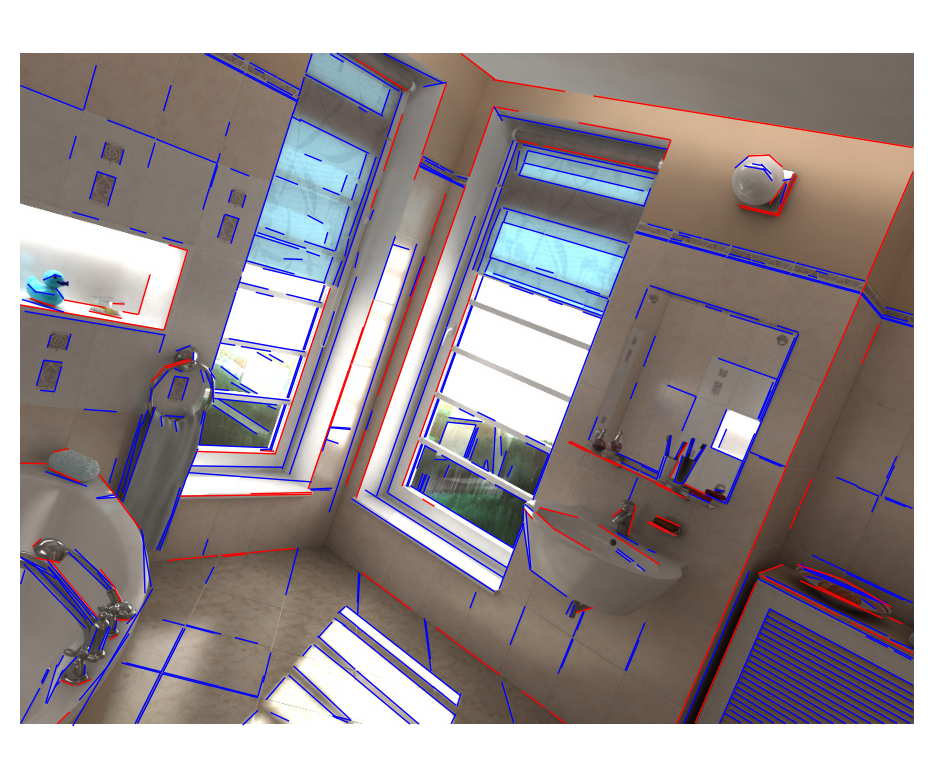

In [34]:
fig = plt.figure()
plt.imshow(img)

for tp_id, line in enumerate(lines):
    x, y, dx, dy = line[0] # this is yxyx
    color = 'red' if line[1] == 0 else 'blue'
    plt.plot( [x, x+dx], [y, y+dy], linewidth=0.5, color=color, zorder=1)

plt.axis('off')
plt.show()